In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def train_with_GD():
    model = create_model()
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    return history

def train_with_SGD():
    model = create_model()
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test), verbose=0)
    return history

In [9]:
history_GD = train_with_GD()
history_SGD = train_with_SGD()

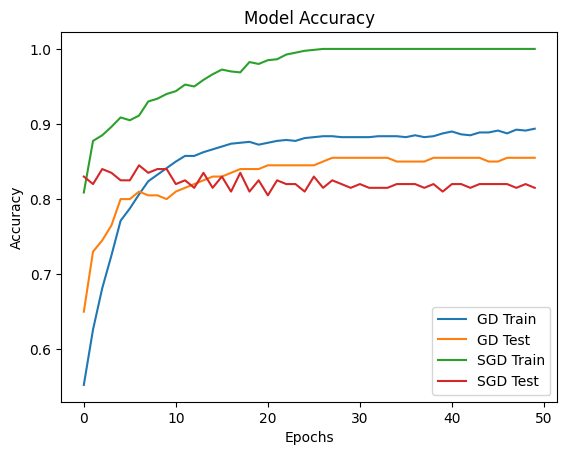

In [10]:
plt.plot(history_GD.history['accuracy'], label='GD Train')
plt.plot(history_GD.history['val_accuracy'], label='GD Test')
plt.plot(history_SGD.history['accuracy'], label='SGD Train')
plt.plot(history_SGD.history['val_accuracy'], label='SGD Test')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()